<a href="https://colab.research.google.com/github/SoumyajeetM/ARIMA_Sales_Forecasting/blob/main/AutoARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Step 1: Read the CSV file
df = pd.read_excel('LAD.xlsx')

# Step 2: Convert the datetime columns to date
df['iexceed_app_create_ts'] = pd.to_datetime(df['iexceed_app_create_ts']).dt.date
df['uw_disbursement_date'] = pd.to_datetime(df['uw_disbursement_date']).dt.date

# # Step 3: Define the filter date (August 1, 2023)
# filter_date = pd.to_datetime('2022-06-01').date()

# # Step 4: Filter the data where both columns are greater than or equal to August 1, 2023
# df = df[df['uw_disbursement_date'] >= filter_date]

# Step 3: Group by 'iexceed_app_create_ts' and count 'application_id'
grouped_by_create_date = df.groupby(['iexceed_app_create_ts'])['application_id'].count().reset_index()
grouped_by_create_date.rename(columns={'application_id': 'application_count'}, inplace=True)

# Step 4: Group by 'uw_disbursement_date' and count 'application_id'
grouped_by_disbursement_date = df.groupby(['uw_disbursement_date'])['application_id'].count().reset_index()
grouped_by_disbursement_date.rename(columns={'application_id': 'application_count'}, inplace=True)

# Step 5: Display the two DataFrames
print("Grouped by iexceed_app_create_ts:")
print(grouped_by_create_date)

print("\nGrouped by uw_disbursement_date:")
print(grouped_by_disbursement_date)

Grouped by iexceed_app_create_ts:
    iexceed_app_create_ts  application_count
0              2023-02-21                  2
1              2023-02-23                  1
2              2023-02-28                  1
3              2023-03-01                  2
4              2023-03-02                  1
..                    ...                ...
568            2024-09-27                654
569            2024-09-28                589
570            2024-09-29                553
571            2024-09-30                786
572            2024-10-01                225

[573 rows x 2 columns]

Grouped by uw_disbursement_date:
    uw_disbursement_date  application_count
0             2023-10-12                  2
1             2023-10-14                  1
2             2023-10-16                 81
3             2023-10-17                 40
4             2023-10-18                  8
..                   ...                ...
344           2024-09-27                 31
345           20

In [3]:
import pandas as pd

# Step 1: Read the CSV file
df = pd.read_excel('LAD.xlsx')

# Step 2: Convert the datetime columns to date
df['iexceed_app_create_ts'] = pd.to_datetime(df['iexceed_app_create_ts']).dt.date
df['uw_disbursement_date'] = pd.to_datetime(df['uw_disbursement_date']).dt.date

# Step 3: Add 'Year Week Number' column for 'iexceed_app_create_ts'
df['iexceed_app_create_ts'] = pd.to_datetime(df['iexceed_app_create_ts'])
df['year_week_create'] = df['iexceed_app_create_ts'].dt.strftime('%Y-W%U')

# Step 4: Add 'Year Week Number' column for 'uw_disbursement_date'
df['uw_disbursement_date'] = pd.to_datetime(df['uw_disbursement_date'])
df['year_week_disbursement'] = df['uw_disbursement_date'].dt.strftime('%Y-W%U')

# Step 5: Group by 'year_week_create' and count 'application_id'
grouped_by_create_date = df.groupby(['year_week_create'])['application_id'].count().reset_index()
grouped_by_create_date.rename(columns={'application_id': 'application_count'}, inplace=True)

# Step 6: Group by 'year_week_disbursement' and count 'application_id'
grouped_by_disbursement_date = df.groupby(['year_week_disbursement'])['application_id'].count().reset_index()
grouped_by_disbursement_date.rename(columns={'application_id': 'application_count'}, inplace=True)

# Step 7: Display the two DataFrames
print("Grouped by Year Week (Create Date):")
print(grouped_by_create_date)

print("\nGrouped by Year Week (Disbursement Date):")
print(grouped_by_disbursement_date)

Grouped by Year Week (Create Date):
   year_week_create  application_count
0          2023-W08                  3
1          2023-W09                  5
2          2023-W10                 16
3          2023-W11                  5
4          2023-W12                 15
..              ...                ...
81         2024-W35               7292
82         2024-W36               6279
83         2024-W37               6950
84         2024-W38               5822
85         2024-W39               1564

[86 rows x 2 columns]

Grouped by Year Week (Disbursement Date):
   year_week_disbursement  application_count
0                2023-W41                  3
1                2023-W42                158
2                2023-W43                 86
3                2023-W44                 32
4                2023-W45                 79
5                2023-W46                 36
6                2023-W47                 70
7                2023-W48                217
8                2023-W49

In [4]:
with pd.ExcelWriter('grouped_loan_applications.xlsx') as writer:
    grouped_by_create_date.to_excel(writer, sheet_name='Grouped by Create Date', index=False)
    grouped_by_disbursement_date.to_excel(writer, sheet_name='Grouped by Disbursement Date', index=False)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

Predicted percentage for 2024-W35: 7.47%
Predicted percentage for 2024-W36: 7.66%
Predicted percentage for 2024-W37: 7.70%
Predicted percentage for 2024-W38: 7.71%
Predicted percentage for 2024-W39: 7.72%


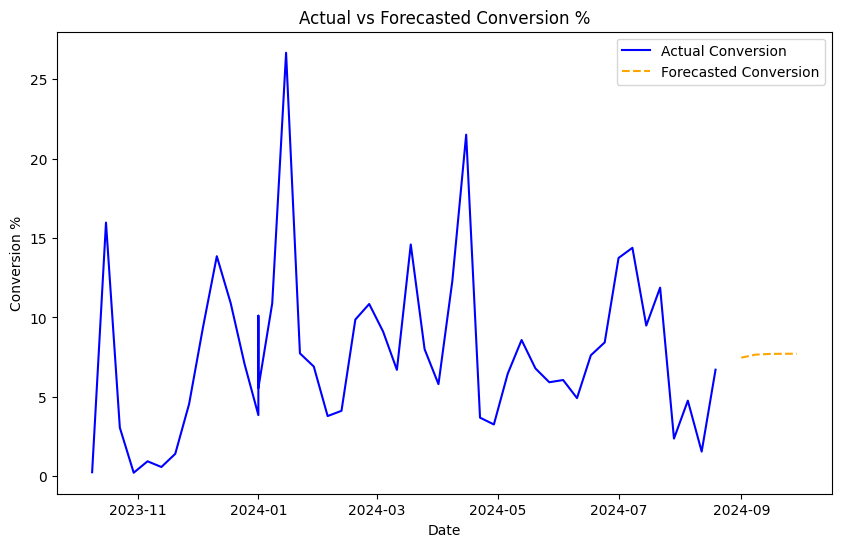

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Step 1: Define the dataset
data = {
    'year_week_disbursement': [
        '2023-W41', '2023-W42', '2023-W43', '2023-W44', '2023-W45', '2023-W46', '2023-W47', '2023-W48',
        '2023-W49', '2023-W50', '2023-W51', '2023-W52', '2023-W53', '2024-W00', '2024-W01', '2024-W02',
        '2024-W03', '2024-W04', '2024-W05', '2024-W06', '2024-W07', '2024-W08', '2024-W09', '2024-W10',
        '2024-W11', '2024-W12', '2024-W13', '2024-W14', '2024-W15', '2024-W16', '2024-W17', '2024-W18',
        '2024-W19', '2024-W20', '2024-W21', '2024-W22', '2024-W23', '2024-W24', '2024-W25', '2024-W26',
        '2024-W27', '2024-W28', '2024-W29', '2024-W30', '2024-W31', '2024-W32', '2024-W33', '2024-W34'
    ],
    'Conversion': [
        '0.25%', '15.98%', '3.06%', '0.22%', '0.94%', '0.58%', '1.41%', '4.55%',
        '9.37%', '13.86%', '10.91%', '7.08%', '3.85%', '10.11%', '5.55%', '10.89%',
        '26.68%', '7.74%', '6.91%', '3.79%', '4.12%', '9.87%', '10.85%', '9.12%',
        '6.70%', '14.60%', '8.00%', '5.80%', '12.29%', '21.52%', '3.69%', '3.26%',
        '6.46%', '8.58%', '6.79%', '5.92%', '6.06%', '4.92%', '7.62%', '8.43%',
        '13.75%', '14.39%', '9.49%', '11.88%', '2.37%', '4.76%', '1.55%', '6.71%'
    ]
}

# Step 2: Create DataFrame and clean the data
df = pd.DataFrame(data)

# Remove '%' and convert to float
df['Conversion'] = df['Conversion'].str.rstrip('%').astype(float)

# Step 3: Convert 'year_week_disbursement' to a date-like format (ISO week)
df['year_week_disbursement'] = pd.to_datetime(df['year_week_disbursement'] + '-1', format='%Y-W%W-%w')

# Set the index to the date
df.set_index('year_week_disbursement', inplace=True)

# Step 4: Fit the ARIMA model
model = ARIMA(df['Conversion'], order=(1, 1, 1))  # Adjust the order as needed
model_fit = model.fit()

# Step 5: Forecast the next 5 weeks
forecast_steps = 5
forecast = model_fit.forecast(steps=forecast_steps)

# Create future date index for the forecast (next 5 weeks)
future_dates = pd.date_range(start=df.index[-1] + pd.DateOffset(weeks=1), periods=forecast_steps, freq='W')

# Combine forecast into a new DataFrame
forecast_df = pd.DataFrame(forecast, index=future_dates, columns=['Forecast'])

# Step 6: Print forecasted values
for date, value in zip(future_dates, forecast):
    print(f"Predicted percentage for {date.strftime('%Y-W%W')}: {value:.2f}%")

# Step 7: Plot the actual data and forecast
plt.figure(figsize=(10,6))
plt.plot(df.index, df['Conversion'], label='Actual Conversion', color='blue')
plt.plot(future_dates, forecast, label='Forecasted Conversion', linestyle='--', color='orange')
plt.title('Actual vs Forecasted Conversion %')
plt.xlabel('Date')
plt.ylabel('Conversion %')
plt.legend()
plt.show()


In [10]:
pip install pmdarima


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 16.8 MB/s eta 0:00:00


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.66 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=353.278, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=315.029, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=331.072, Time=0.51 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=314.497, Time=0.86 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=313.363, Time=0.41 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=314.405, Time=0.19 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=0.59 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=2.98 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=inf, Time=3.74 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=303.153, Time=0.56 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=301.158, Time=0.19 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=299.496, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=299.839, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=301.151, Time=0.44 se

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


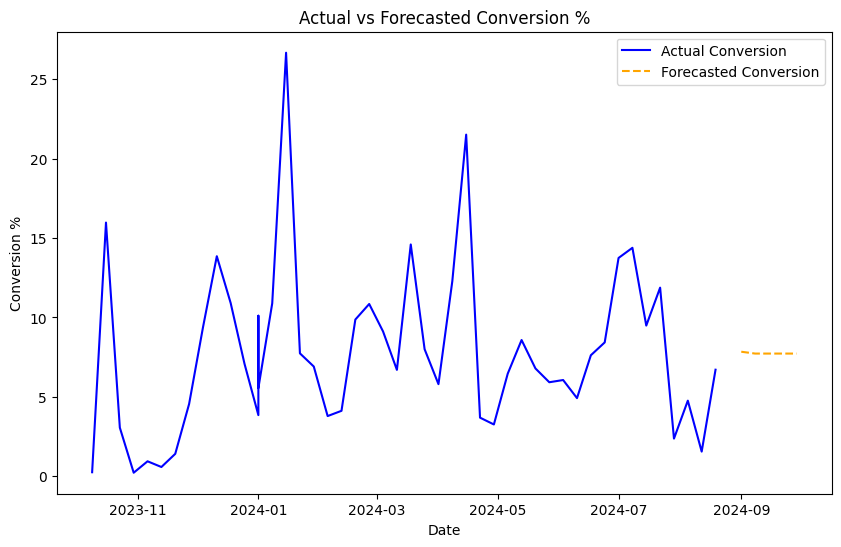

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima

# Step 1: Define the dataset
data = {
    'year_week_disbursement': [
        '2023-W41', '2023-W42', '2023-W43', '2023-W44', '2023-W45', '2023-W46', '2023-W47', '2023-W48',
        '2023-W49', '2023-W50', '2023-W51', '2023-W52', '2023-W53', '2024-W00', '2024-W01', '2024-W02',
        '2024-W03', '2024-W04', '2024-W05', '2024-W06', '2024-W07', '2024-W08', '2024-W09', '2024-W10',
        '2024-W11', '2024-W12', '2024-W13', '2024-W14', '2024-W15', '2024-W16', '2024-W17', '2024-W18',
        '2024-W19', '2024-W20', '2024-W21', '2024-W22', '2024-W23', '2024-W24', '2024-W25', '2024-W26',
        '2024-W27', '2024-W28', '2024-W29', '2024-W30', '2024-W31', '2024-W32', '2024-W33', '2024-W34'
    ],
    'Conversion': [
        '0.25%', '15.98%', '3.06%', '0.22%', '0.94%', '0.58%', '1.41%', '4.55%',
        '9.37%', '13.86%', '10.91%', '7.08%', '3.85%', '10.11%', '5.55%', '10.89%',
        '26.68%', '7.74%', '6.91%', '3.79%', '4.12%', '9.87%', '10.85%', '9.12%',
        '6.70%', '14.60%', '8.00%', '5.80%', '12.29%', '21.52%', '3.69%', '3.26%',
        '6.46%', '8.58%', '6.79%', '5.92%', '6.06%', '4.92%', '7.62%', '8.43%',
        '13.75%', '14.39%', '9.49%', '11.88%', '2.37%', '4.76%', '1.55%', '6.71%'
    ]
}

# Step 2: Create DataFrame and clean the data
df = pd.DataFrame(data)

# Remove '%' and convert to float
df['Conversion'] = df['Conversion'].str.rstrip('%').astype(float)

# Step 3: Convert 'year_week_disbursement' to a date-like format (ISO week)
df['year_week_disbursement'] = pd.to_datetime(df['year_week_disbursement'] + '-1', format='%Y-W%W-%w')

# Set the index to the date
df.set_index('year_week_disbursement', inplace=True)

# Step 4: Use auto_arima to find the best ARIMA model
model = auto_arima(df['Conversion'],
                   seasonal=False,    # If your data is seasonal, you can set this to True
                   trace=True,        # Set to True to see the steps of the model selection
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True)     # Stepwise model-fit search for best parameters

# Step 5: Print model summary
print(model.summary())

# Step 6: Forecast the next 5 weeks
forecast_steps = 5
forecast = model.predict(n_periods=forecast_steps)

# Create future date index for the forecast (next 5 weeks)
future_dates = pd.date_range(start=df.index[-1] + pd.DateOffset(weeks=1), periods=forecast_steps, freq='W')

# Combine forecast into a new DataFrame
forecast_df = pd.DataFrame(forecast, index=future_dates, columns=['Forecast'])

# Step 7: Print forecasted values
for date, value in zip(future_dates, forecast):
    print(f"Predicted percentage for {date.strftime('%Y-W%W')}: {value:.2f}%")

# Step 8: Plot the actual data and forecast
plt.figure(figsize=(10,6))
plt.plot(df.index, df['Conversion'], label='Actual Conversion', color='blue')
plt.plot(future_dates, forecast, label='Forecasted Conversion', linestyle='--', color='orange')
plt.title('Actual vs Forecasted Conversion %')
plt.xlabel('Date')
plt.ylabel('Conversion %')
plt.legend()
plt.show()
